In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
#Loading Data
Df=pd.read_csv("Dataset_vs/housing/housing.csv")

In [3]:
Df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
Df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

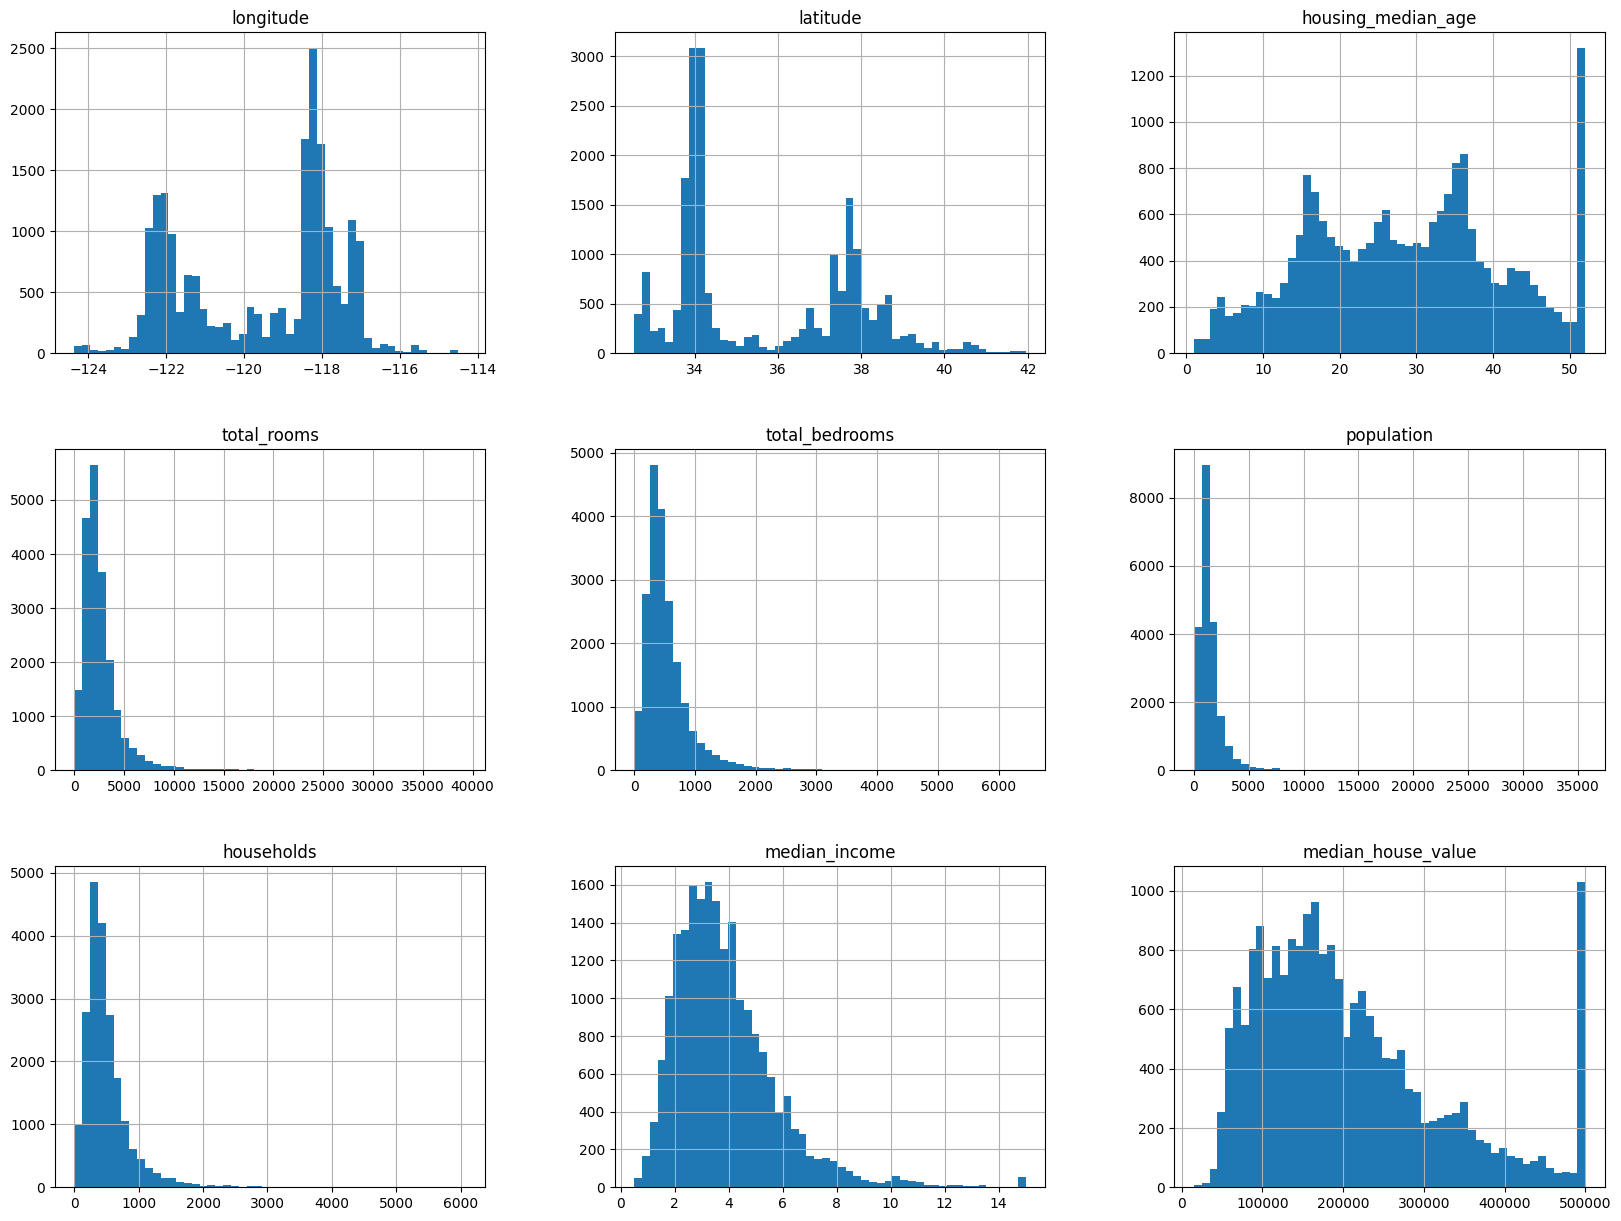

In [6]:
#histogram
Df.hist(bins=50,figsize=(20,15))
plt.show()

In [7]:
median = Df["total_bedrooms"].median()
Df["total_bedrooms"].fillna(median, inplace=True)

In [8]:
#selecting target values
x=Df.iloc[:,[0,1,2,3,4,5,6,7,9]]
y=Df.iloc[:,8]

In [9]:
#shuffling data
import random
ran_state=random.randint(20,300)
x=x.sample(frac=1,random_state=ran_state)
x=x.reset_index()
del x["index"]
print("sampled data with random_state = ",ran_state)

sampled data with random_state =  145


In [10]:
#######  Another alternative
#from sklearn.model_selection import train_test_split
#train_set, test_set = train_test_split(Df, test_size=0.2, random_state=42)

In [11]:
x["income_category"]=pd.cut(x["median_income"],bins=[0,1.5,3,4.5,6,np.inf],labels=[1,2,3,4,5])

<Axes: >

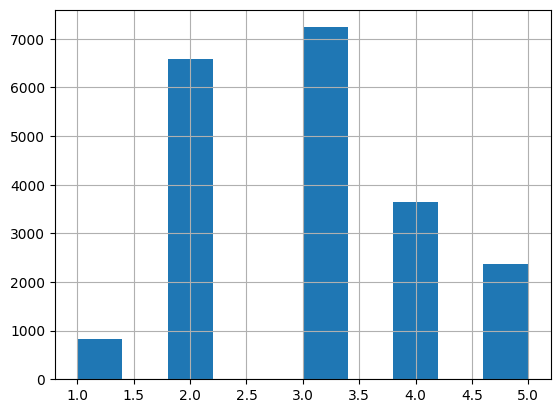

In [12]:
x["income_category"].hist()

In [13]:
del x["income_category"]

In [14]:
Df2=Df.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

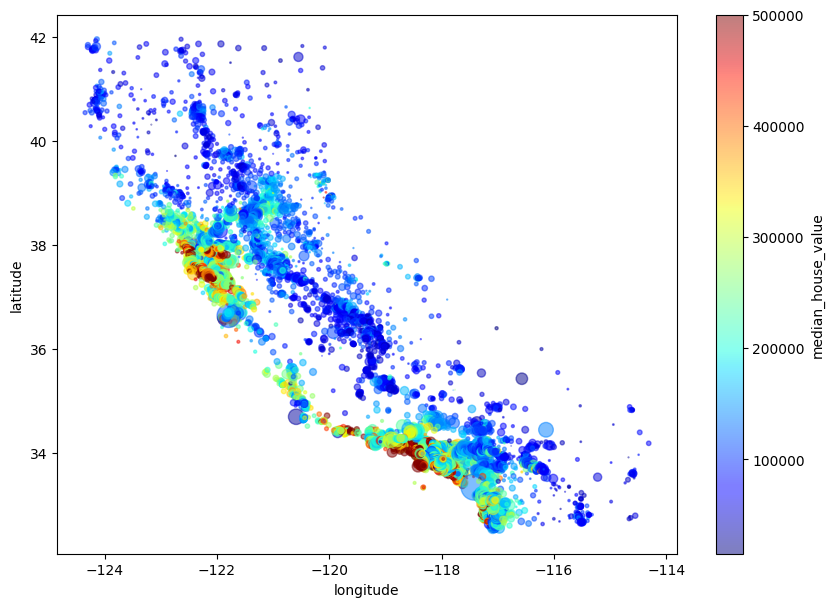

In [15]:
Df2.plot(kind="scatter",x="longitude", y="latitude", alpha=0.5,s=Df2["population"]/100,figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)

In [16]:
corr_matrix=Df2.corr()

/tmp/ipykernel_4919/4172263701.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=Df2.corr()


In [17]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [18]:
Df2.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20640
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [19]:
x.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20640
population            20640
households            20640
median_income         20640
ocean_proximity       20640
dtype: int64

In [20]:
housing_cat = x[["ocean_proximity"]]
#from sklearn.preprocessing import OrdinalEncoder
#ordinal_encoder = OrdinalEncoder()
#housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
#housing_cat_encoded[:10]

In [21]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot
housing_cat_1hot=housing_cat_1hot.toarray()

In [22]:
del x["ocean_proximity"]
op=pd.DataFrame(housing_cat_1hot,columns=cat_encoder.categories_)
op=op.astype("int")
x=pd.concat([x,op],axis=1)
x.columns=[         'longitude',           'latitude', 'housing_median_age',
              'total_rooms',     'total_bedrooms',         'population',
               'households',      'median_income',       '<1H_OCEAN',
                'INLAND',          'ISLAND',        'NEAR_BAY',
            'NEAR_OCEAN']
x_train=x.iloc[:int(0.8*len(x)),:]
x_test=x.iloc[int(0.8*len(x)):,:]
y_train=y.iloc[:int(0.8*len(y))]
y_test=y.iloc[int(0.8*len(y)):]
x_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.574608,35.640435,28.704033,2630.283975,534.888081,1420.053597,497.076005,3.873904,0.443072,0.320191,0.000242,0.110526,0.125969
std,1.996970,2.134486,12.579863,2179.443462,416.674462,1087.076112,377.762700,1.907379,0.496764,0.466564,0.015563,0.313553,0.331824
min,-124.350000,32.550000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.790000,33.940000,18.000000,1443.000000,297.000000,784.000000,278.000000,2.562500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.500000,34.260000,29.000000,2124.000000,435.000000,1166.000000,409.000000,3.538200,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3135.000000,642.000000,1725.000000,602.000000,4.747575,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:

X_train, X_test = [x.iloc[:int(0.5*len(x)), :], x.iloc[int(0.5*len(x)):, :]]
y_train, y_test = [y.iloc[:int(0.5*len(y))], y.iloc[int(0.5*len(y)):]]


In [24]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [25]:
model1.predict(x_train)

array([201537.75022522, 203935.10262415, 200707.33636471, ...,
       202149.32494606, 201215.39918248, 202366.25475773])